# Locally-Weighted Logistic Regression with Regularization Parameter
## Newton-Raphson Method

We implement a locally-weighted logistic regression with a regularization parameter. The "locally-weighted" property makes it rather tedious to code this module without compartmentalizing into functions since it is non-parametric. The Newton-Raphson method maximizes the likelihood function.

The dataset was obtained from https://see.stanford.edu/materials/aimlcs229/PS1-data.zip

In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the feature and target matrices from files.
#m=69 training examples, n=2 features per training example
X=np.loadtxt('data/q1x.dat') #m*n feature matrix
Y=np.loadtxt('data/q1y.dat') #m*1 target matrix

Let's first visualize the data. Both features vary from (-1,1). Blue indicates Y_i=1; black indicates Y_i=0.

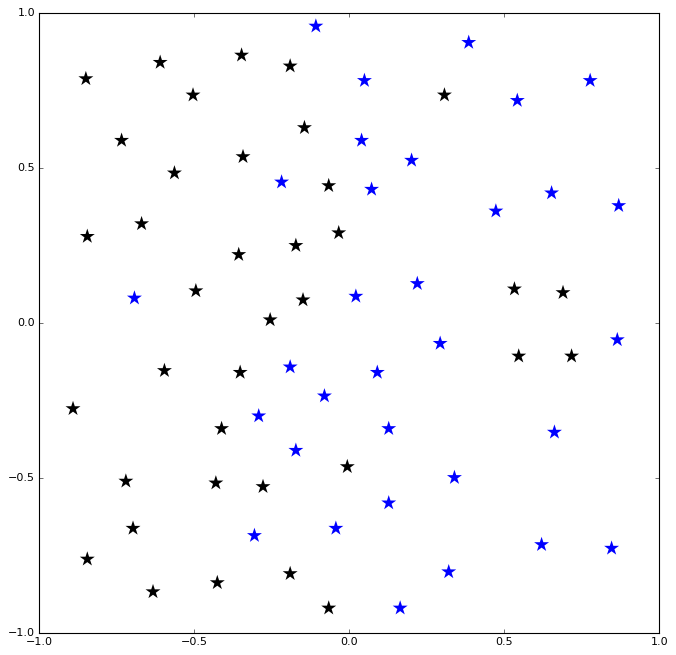

In [3]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax1 = fig.add_subplot(111)

colors = ['black' if i==0 else 'blue' for i in Y]
ax1.scatter(X[:,0],X[:,1], c=colors, s=200, marker='*', linewidth=0)
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.show()

In [4]:
#X is the feature matrix, Y is the target matrix, x is the query point, tau is the bandwidth parameter.
def lwlr (X, Y, x, tau):
    X_T = np.transpose(X) #n*m feature matrix transposed
    m = len(X) #m=69 data points
    n = len(X[0,:]) #n=2 features
    reg = 0.0001 #regularization parameter
    g = np.ones(n) #initialize the gradient

    theta = np.zeros(n) #n*1 parameter matrix

    exp = -1* np.square( np.linalg.norm( np.zeros((m,2))+x - X, axis=1) / (2*tau*tau) )
    w = np.exp ( exp ) # m*1 weight matrix

    while(np.linalg.norm(g)> 1e-6):

        h = 1 / (1+ np.exp( -1* np.dot( X, theta ) )) #m*1 hypothesis matrix

        z = w*(Y-h)
        g = np.dot(X_T,z)-reg*theta #n*1 gradient

        D = np.diag( -1* w*h*(1-h))
        temp1=np.dot(X_T,D)
        H = np.dot(temp1,X)-reg*np.eye(n) #n*n Hessian matrix
        H_inv = np.linalg.inv(H)

        theta = theta - np.dot(H_inv,g)

    return int(np.dot(x,theta) > 0) #if the exponent is positive, h>0.5; if h>0.5 return 1!

In [5]:
#X is the feature matrix, Y is the target matrix tau is the bandwidth parameter
#resolution is the resolution of the model
def plot_lwlr (X, Y, tau, resolution):
    
    x0 = np.linspace(-1,1, num=resolution) #feature 0
    x1 = np.linspace(-1,1, num=resolution) #feature 1
    X_model = np.zeros((resolution*resolution,2))
    model = np.zeros(resolution*resolution)
    for i in range(0,resolution):
        for j in range(0,resolution):
            X_model[i*resolution+j] = [x0[i],x1[j]]
            model[i*resolution+j] = lwlr(X, Y, [x0[i],x1[j]], tau)
            
    fig = plt.figure(figsize=(10,10), dpi=80)
    ax1 = fig.add_subplot(111)

    colors = ['black' if i==0 else 'blue' for i in Y] #for the true data
    ax1.scatter(X[:,0],X[:,1], c=colors, s=200, marker='*', linewidth=0, alpha=1)

    colors_model = ['black' if i==0 else 'blue' for i in model] #for the model
    ax1.scatter(X_model[:,0],X_model[:,1], c=colors_model, s=130, marker='s', alpha=0.35, linewidth=0)

    plt.ylim(-1,1)
    plt.xlim(-1,1)
    plt.show()
    
    fraction = str(np.sum(model)/len(model)*100)    
    print "The graph is " + fraction + "% blue. The bandwidth parameter is " + str(tau)

With low bandwidth parameter, the model tends to overfit.

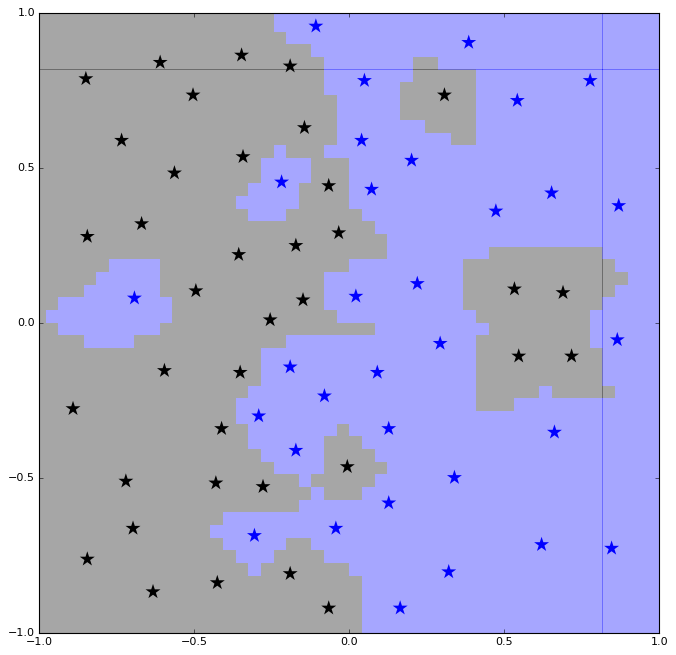

The graph is 51.56% blue. The bandwidth parameter is 0.1


In [6]:
plot_lwlr(X,Y,0.1,50)

At tau=0.35, the model is more reasonable. The spot around the 4 black stars on the right is questionable.

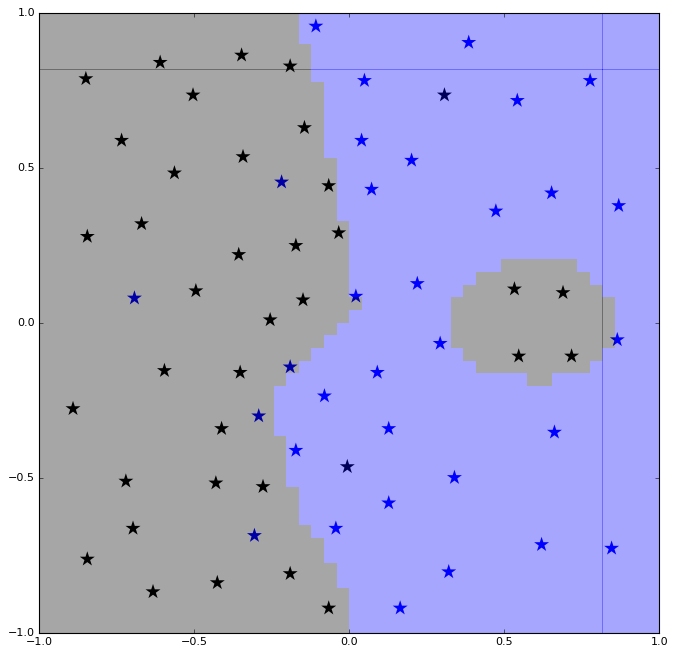

The graph is 50.68% blue. The bandwidth parameter is 0.35


In [7]:
plot_lwlr(X,Y,0.35,50)

At tau=0.5, the model only separates in the middle, but it curves.

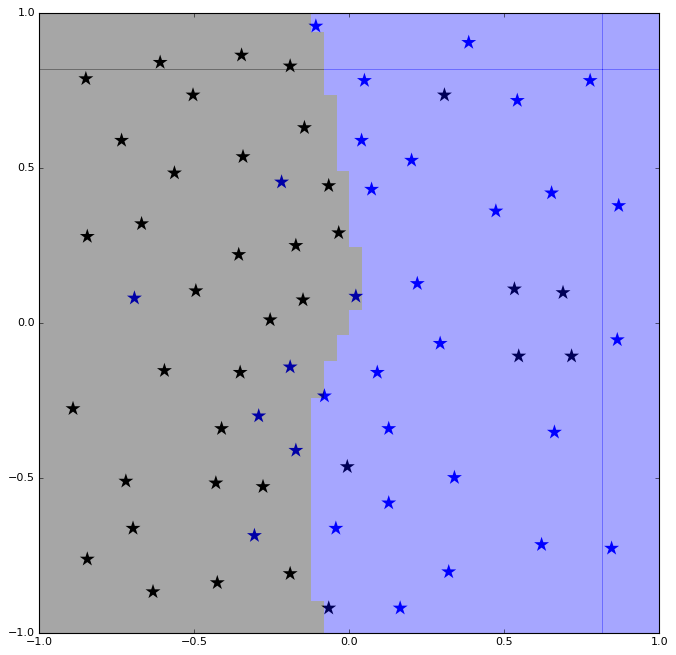

The graph is 53.16% blue. The bandwidth parameter is 0.5


In [8]:
plot_lwlr(X,Y,0.5,50)

At tau approaches infinity, the "locally-weighted" property is no longer. A straight line divides the data.

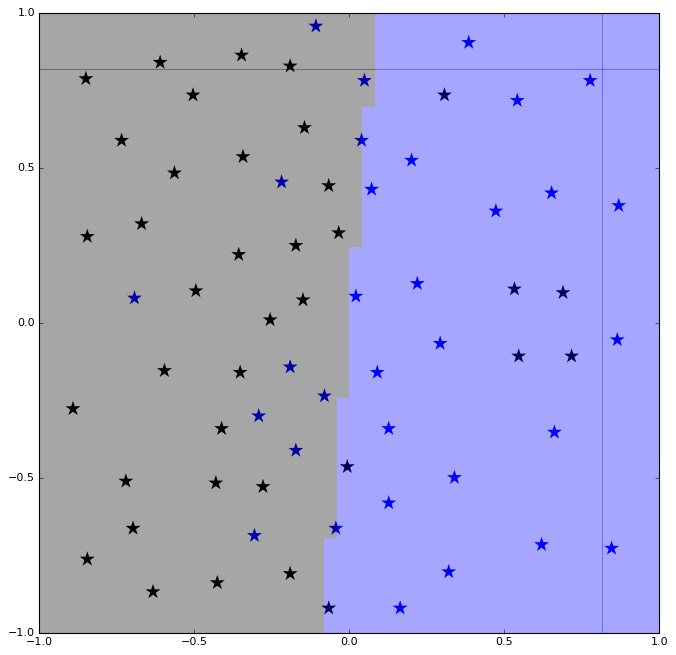

The graph is 50.0% blue. The bandwidth parameter is 5


In [9]:
plot_lwlr(X,Y,5,50)